In [1]:
import torch
from pytorch_pretrained_biggan import (
    BigGAN,
    truncated_noise_sample,
    one_hot_from_int
)
import PIL.Image
import numpy as np
import os
import argparse
from tqdm import tqdm
import json
import pickle
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

In [2]:
def convert_to_images(obj):
    """ Convert an output tensor from BigGAN in a list of images.
    """
    # need to fix import, see: https://github.com/huggingface/pytorch-pretrained-BigGAN/pull/14/commits/68a7446951f0b9400ebc7baf466ccc48cdf1b14c
    if not isinstance(obj, np.ndarray):
        obj = obj.detach().numpy()
    obj = obj.transpose((0, 2, 3, 1))
    obj = np.clip(((obj + 1) / 2.0) * 256, 0, 255)
    img = []
    for i, out in enumerate(obj):
        out_array = np.asarray(np.uint8(out), dtype=np.uint8)
        img.append(PIL.Image.fromarray(out_array))
    return img

In [3]:
model_name = 'biggan-deep-%s' % 256
truncation = 1.0
model = BigGAN.from_pretrained(model_name).cuda()

In [4]:
with open('n01558993/z_dataset.pkl', 'rb') as fid:
    z_dict = pickle.load(fid)

In [5]:
z_dict.keys()

dict_keys(['seed0015_sample00000_anchor.png', 'seed0015_sample00001_anchor.png', 'seed0015_sample00000_1.0_1.png', 'seed0015_sample00001_1.0_1.png', 'seed0015_sample00000_1.0_2.png', 'seed0015_sample00001_1.0_2.png', 'seed0015_sample00000_1.0_3.png', 'seed0015_sample00001_1.0_3.png', 'seed0015_sample00000_1.0_4.png', 'seed0015_sample00001_1.0_4.png', 'seed0015_sample00000_1.0_5.png', 'seed0015_sample00001_1.0_5.png', 'seed0015_sample00000_1.0_6.png', 'seed0015_sample00001_1.0_6.png', 'seed0015_sample00000_1.0_7.png', 'seed0015_sample00001_1.0_7.png', 'seed0015_sample00000_1.0_8.png', 'seed0015_sample00001_1.0_8.png', 'seed0015_sample00000_1.0_9.png', 'seed0015_sample00001_1.0_9.png', 'seed0015_sample00000_1.0_10.png', 'seed0015_sample00001_1.0_10.png', 'seed0015_sample00000_1.0_11.png', 'seed0015_sample00001_1.0_11.png', 'seed0015_sample00000_1.0_12.png', 'seed0015_sample00001_1.0_12.png', 'seed0015_sample00000_1.0_13.png', 'seed0015_sample00001_1.0_13.png', 'seed0015_sample00000_1.0_1

In [6]:
zy = z_dict['seed0015_sample00000_anchor.png']
z_cls_idx = zy[1]
z_vect = torch.unsqueeze(zy[0], axis=0)

In [7]:
class_vector = one_hot_from_int(z_cls_idx, batch_size=1)
class_vector = torch.from_numpy(class_vector).cuda()

In [8]:
with torch.no_grad():
    output = model(z_vect, class_vector, truncation)

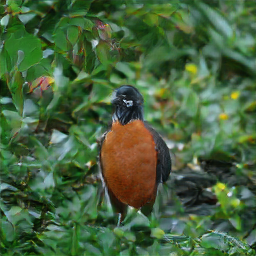

In [9]:
output = output.cpu()
ims = convert_to_images(output)
ims[0]